In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_absolute_error

In [15]:
from google.colab import files
uploaded = files.upload()


Saving Data.xlsx to Data (1).xlsx


In [16]:
#Load Excel file into a Pandas dataframe

data = pd.read_excel("Data.xlsx") 


In [17]:
data.head()

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
0,1,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,...,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
1,2,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,...,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
2,3,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,...,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
3,4,31.489799,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,...,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300
4,5,32.023800,34.513088,49.516499,961.010010,136.978943,30.897297,74.248001,26.626272,53.537861,...,16.252941,62.022831,204.524536,204.036484,2440.69,21454.61,10.03,112.18,1.2936,1.1364


In [18]:
data.columns

Index(['Date', 'MMAX', 'AAPL', 'AMZN', 'GOOGL', 'MCD', 'GM', 'TSLA', 'PFE',
       'SBUX', 'TWTR', 'VZ', 'WYNN', 'KHC', 'JNJ', 'HST', 'HLT', 'FDX', 'DPZ',
       'SP500', 'DJIA', 'VIXCLS', 'DEXJPUS', 'DEXUSUK', 'DEXUSEU'],
      dtype='object')

In [19]:
# check missing values
# The data set has only one missing value which is in MMAX, which needs to be predicted so no imputation has been performed

data.isna().sum()

Date       0
MMAX       1
AAPL       0
AMZN       0
GOOGL      0
MCD        0
GM         0
TSLA       0
PFE        0
SBUX       0
TWTR       0
VZ         0
WYNN       0
KHC        0
JNJ        0
HST        0
HLT        0
FDX        0
DPZ        0
SP500      0
DJIA       0
VIXCLS     0
DEXJPUS    0
DEXUSUK    0
DEXUSEU    0
dtype: int64

In [20]:
data['MMAX'].mean()

51.88908617454656

In [21]:
# Plot the daily returns of MMAX over the entire period

x=data['MMAX']
y=data['Date']

Text(0.5, 1.0, 'MMAX Daily Returns')

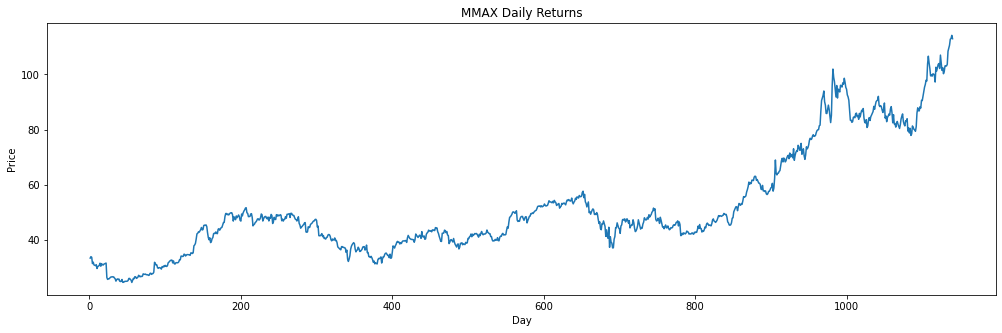

In [22]:
plt.figure(figsize=(17,5))
plt.plot(y,x)
plt.ylabel('Price')
plt.xlabel('Day')
plt.title('MMAX Daily Returns')

In [23]:
# removing the last row from the dataset

df = data.head(data.shape[0]-1)
type(df)

pandas.core.frame.DataFrame

In [25]:
df.tail()

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
1135,1136,110.593086,175.797394,171.068497,2938.330078,263.021027,56.910000,1067.000000,57.795666,111.021172,...,17.323740,154.533844,252.959839,542.713074,4725.79,35950.56,17.96,114.42,1.3410,1.1320
1136,1137,112.766838,179.836319,169.669495,2958.129883,265.285767,57.430000,1093.939941,58.278038,112.848961,...,17.453543,155.113174,255.381592,554.017944,4791.19,36302.38,17.68,114.85,1.3438,1.1329
1137,1138,112.995125,178.799164,170.660995,2933.739990,264.929749,57.110001,1088.469971,57.106567,114.182762,...,17.453543,154.843491,255.570953,554.574707,4786.35,36398.21,17.54,114.75,1.3432,1.1314
1138,1139,114.146523,178.888916,169.201004,2933.100098,265.533020,57.230000,1086.189941,56.683266,114.983032,...,17.453543,155.193085,256.617401,559.178162,4793.06,36488.63,16.95,114.97,1.3475,1.1337
1139,1140,112.935577,177.712143,168.644501,2924.010010,264.267120,58.130001,1070.339966,57.490494,114.844719,...,17.523436,154.803528,257.683777,554.216675,4778.73,36398.08,17.33,115.17,1.3500,1.1318


# Removing Outliers

In [26]:
# Removing Outliers using Statistics

cols = df.columns

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
# Dropping Date and MMAX column

features = df.drop(['Date', 'MMAX'],axis=1)
features.columns

Index(['AAPL', 'AMZN', 'GOOGL', 'MCD', 'GM', 'TSLA', 'PFE', 'SBUX', 'TWTR',
       'VZ', 'WYNN', 'KHC', 'JNJ', 'HST', 'HLT', 'FDX', 'DPZ', 'SP500', 'DJIA',
       'VIXCLS', 'DEXJPUS', 'DEXUSUK', 'DEXUSEU'],
      dtype='object')

In [29]:
labels = df['MMAX']

In [30]:
print("Shape of Features : ", features.shape)
print("Length of Labels : ", len(labels))

Shape of Features :  (725, 23)
Length of Labels :  725


In [31]:
columns = features.columns
columns

Index(['AAPL', 'AMZN', 'GOOGL', 'MCD', 'GM', 'TSLA', 'PFE', 'SBUX', 'TWTR',
       'VZ', 'WYNN', 'KHC', 'JNJ', 'HST', 'HLT', 'FDX', 'DPZ', 'SP500', 'DJIA',
       'VIXCLS', 'DEXJPUS', 'DEXUSUK', 'DEXUSEU'],
      dtype='object')

# Understand the Correlations

### Correlation and Variance can be used to select features, but we will also try advanced techniques like RFE and Selection based on Model Performance

In [32]:
features.corr()

,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,VZ,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
AAPL,1.000000,0.892717,0.957189,0.662610,0.472830,0.893244,0.394905,0.739001,0.629202,0.653227,...,-0.486229,0.728184,0.178261,0.836337,0.942175,0.830803,0.454893,-0.604083,0.055966,0.037471
AMZN,0.892717,1.000000,0.913762,0.701695,0.410194,0.763221,0.628597,0.729956,0.832641,0.738767,...,-0.300911,0.725427,0.125852,0.933108,0.910505,0.860802,0.552025,-0.615095,-0.061222,-0.056544
GOOGL,0.957189,0.913762,1.000000,0.699536,0.494125,0.802497,0.448521,0.751052,0.703971,0.718579,...,-0.358338,0.803856,0.118779,0.853351,0.968835,0.899124,0.411958,-0.574834,0.033701,-0.052737
MCD,0.662610,0.701695,0.699536,1.000000,0.326573,0.431176,0.540627,0.965394,0.657210,0.893665,...,-0.436570,0.841784,-0.439011,0.624508,0.786215,0.812193,0.376570,-0.539779,-0.446803,-0.510395
GM,0.472830,0.410194,0.494125,0.326573,1.000000,0.597309,0.101832,0.372722,0.406970,0.200565,...,-0.091810,0.422520,0.382089,0.243491,0.486483,0.447339,0.019881,-0.338641,0.282892,0.307763
TSLA,0.893244,0.763221,0.802497,0.431176,0.597309,1.000000,0.253137,0.537493,0.511407,0.381522,...,-0.526496,0.461067,0.411042,0.676643,0.749807,0.586642,0.458850,-0.566304,0.235238,0.329488
PFE,0.394905,0.628597,0.448521,0.540627,0.101832,0.253137,1.000000,0.475707,0.506105,0.732528,...,0.075302,0.434294,-0.151401,0.631926,0.503374,0.599414,0.337523,-0.107858,-0.289279,-0.343785
SBUX,0.739001,0.729956,0.751052,0.965394,0.372722,0.537493,0.475707,1.000000,0.650556,0.851437,...,-0.523277,0.857331,-0.368533,0.649976,0.830164,0.818936,0.375096,-0.638916,-0.364665,-0.417567
TWTR,0.629202,0.832641,0.703971,0.657210,0.406970,0.511407,0.506105,0.650556,1.000000,0.638781,...,-0.109443,0.667385,0.021470,0.743948,0.718606,0.725656,0.501832,-0.592310,-0.155596,-0.138745
VZ,0.653227,0.738767,0.718579,0.893665,0.200565,0.381522,0.732528,0.851437,0.638781,1.000000,...,-0.277641,0.789359,-0.399607,0.721553,0.784297,0.845577,0.399586,-0.412456,-0.398740,-0.530745


# Plotting The MMAX

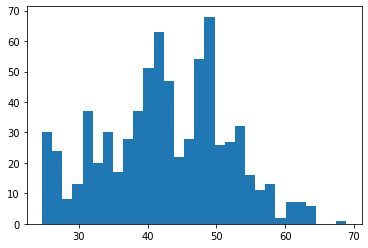

In [33]:
plt.hist(df['MMAX'],bins = 30)
plt.show()

# Feature Selection

## Based on Correlation

<AxesSubplot:>

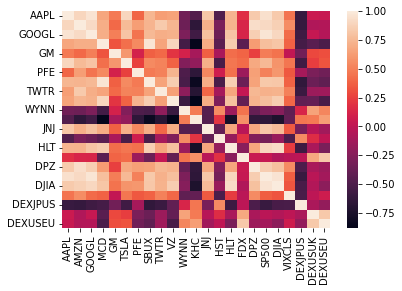

In [34]:
sns.heatmap(features.corr())

In [35]:
## Splitting data into train & test

from sklearn.model_selection import train_test_split

features,test_features,labels,test_labels = train_test_split(features,labels,test_size=0.2)  #20% test data 80% train data

In [36]:
correlation_matrix = features.corr()
correlation_matrix

,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,VZ,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
AAPL,1.000000,0.893130,0.959321,0.661027,0.484581,0.895456,0.403176,0.738858,0.622010,0.652623,...,-0.483044,0.729218,0.207732,0.837836,0.942280,0.832553,0.434686,-0.603083,0.055263,0.053450
AMZN,0.893130,1.000000,0.914827,0.704460,0.432057,0.770198,0.633405,0.735260,0.829755,0.740250,...,-0.301733,0.728084,0.150949,0.936069,0.910146,0.860227,0.542066,-0.620045,-0.056937,-0.042528
GOOGL,0.959321,0.914827,1.000000,0.705216,0.502665,0.805772,0.458970,0.757640,0.693945,0.724171,...,-0.361261,0.807435,0.139210,0.858091,0.969833,0.901219,0.393052,-0.578075,0.029357,-0.042542
MCD,0.661027,0.704460,0.705216,1.000000,0.332032,0.431487,0.550833,0.966543,0.659274,0.897073,...,-0.432564,0.840615,-0.426152,0.623599,0.788018,0.815860,0.359825,-0.534907,-0.453027,-0.507554
GM,0.484581,0.432057,0.502665,0.332032,1.000000,0.603667,0.109540,0.377297,0.404243,0.208737,...,-0.107571,0.421595,0.388344,0.277600,0.495412,0.452567,0.002881,-0.347626,0.276407,0.311811
TSLA,0.895456,0.770198,0.805772,0.431487,0.603667,1.000000,0.265619,0.538498,0.500389,0.385843,...,-0.531880,0.462406,0.434188,0.690593,0.751835,0.589405,0.442528,-0.568245,0.228218,0.339193
PFE,0.403176,0.633405,0.458970,0.550833,0.109540,0.265619,1.000000,0.486383,0.505499,0.736501,...,0.057172,0.437612,-0.152508,0.647066,0.507906,0.600340,0.360359,-0.115115,-0.285199,-0.341833
SBUX,0.738858,0.735260,0.757640,0.966543,0.377297,0.538498,0.486383,1.000000,0.650735,0.854163,...,-0.521603,0.856602,-0.348882,0.652645,0.833437,0.824764,0.360048,-0.636236,-0.368724,-0.409654
TWTR,0.622010,0.829755,0.693945,0.659274,0.404243,0.500389,0.505499,0.650735,1.000000,0.645335,...,-0.111567,0.664733,0.022435,0.750739,0.711903,0.719387,0.494678,-0.594615,-0.165438,-0.141229
VZ,0.652623,0.740250,0.724171,0.897073,0.208737,0.385843,0.736501,0.854163,0.645335,1.000000,...,-0.276388,0.786932,-0.388377,0.720657,0.784447,0.846203,0.391323,-0.410777,-0.403402,-0.528003


In [37]:
# #Function to select features based on correlation

def features_based_on_corr (features,threshold):
  correlation_matrix = features.corr()
  correlated_features = set()
  for i in range(len(correlation_matrix)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i,j]) > threshold:
        corr_col = correlation_matrix.columns[i]
        correlated_features.add(corr_col)
  # print("Selected Features with high correlation with atleast one of other columns are :")
  # print(correlated_features)
  filtered_features = features.drop(correlated_features,axis=1)
  # print("The final DataFrame is as :")
  return filtered_features


In [38]:
filtered_features = features_based_on_corr(features,0.6)
filtered_features.columns

Index(['AAPL', 'GM', 'WYNN', 'HST', 'FDX', 'VIXCLS'], dtype='object')

## Based on Recursive Feature Elimination

In [39]:
# using Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfr = RandomForestRegressor()

def based_on_model (estimator,n_features,features,labels):
  rfe = RFE(estimator=estimator, n_features_to_select=n_features, step=1)
  rfe.fit(features,labels)
  # print("Rankings are :",rfe.ranking_)
  attributes_to_retain = rfe.get_support(1)
  # print("Selected Columns :", features.columns[attributes_to_retain])
  # print("The final DataFrame is below :")
  rfe_features = features[features.columns[attributes_to_retain]] # Final Dataframe with selected columns
  return rfe_features

rfe_features = based_on_model (rfr,15,features,labels)
rfe_features.head()


,AAPL,AMZN,TSLA,PFE,SBUX,TWTR,VZ,WYNN,KHC,JNJ,HLT,DPZ,SP500,DJIA,DEXUSEU
633,71.194122,93.489998,86.075996,33.954651,83.925262,32.549999,55.053749,138.646561,28.169178,136.643646,112.090019,285.822815,3240.02,28645.26,1.1174
435,45.701633,87.107498,53.897999,35.116390,66.562386,31.080000,50.368282,112.193222,27.365988,125.903511,85.575211,236.315491,2832.94,25914.10,1.1337
662,79.181526,106.695503,154.255997,32.984230,83.742371,35.959999,54.460468,126.815842,26.449800,142.371887,111.072746,268.750336,3352.09,29276.82,1.0916
77,37.195644,49.750000,70.919998,29.037262,50.562576,17.730000,40.041328,134.489609,62.744698,120.571167,68.904198,200.360535,2555.24,22872.89,1.1847
63,36.444839,48.232498,73.295998,28.654882,49.990074,17.580000,39.631439,136.489075,63.402721,116.247704,66.078163,189.635773,2500.60,22359.23,1.1946


## Modeling

In [40]:
from sklearn.svm import SVR

In [41]:
estimators ={"Linear ":LinearRegression(),"SVR":SVR()}
for i in estimators:
  print(estimators[i])

LinearRegression()
SVR()


In [42]:
# Model training

estimators ={"Linear Regressor":LinearRegression(),"Random Forest":RandomForestRegressor()}

thresholds =[0.6,0.7,0.8]

def feature_sets(estimators,models,features,labels,thresholds,n_features):
  covariance_features = {}
  perfomance_based_features = {}
  for i in thresholds:
    result = features_based_on_corr(features,i)
    covariance_features["Threshold Value",str(i)]=result
  for i in estimators:
    result = based_on_model(estimators[i],n_features,features,labels)
    perfomance_based_features[i]=result
  return covariance_features,perfomance_based_features
  


In [43]:
models = {"Linear Regressor": LinearRegression(), "Random Forest Regressor":RandomForestRegressor(),"SVR":SVR()}

In [44]:
corr_features, perfomance_features = feature_sets(estimators,models,features,labels,thresholds,15)

In [45]:
for i in corr_features:
  print(str(i))
  print(corr_features[i].columns)

('Threshold Value', '0.6')
Index(['AAPL', 'GM', 'WYNN', 'HST', 'FDX', 'VIXCLS'], dtype='object')
('Threshold Value', '0.7')
Index(['AAPL', 'GM', 'PFE', 'WYNN', 'HST', 'FDX', 'VIXCLS', 'DEXJPUS',
       'DEXUSUK'],
      dtype='object')
('Threshold Value', '0.8')
Index(['AAPL', 'MCD', 'GM', 'PFE', 'WYNN', 'HST', 'FDX', 'VIXCLS', 'DEXJPUS',
       'DEXUSUK'],
      dtype='object')


In [46]:
# Train models using the function in order to generate objects of trained models that can be used for prediction later

def train_models (models,feature_set1,feature_set2):
  feature_sets = [feature_set1,feature_set2]
  results = {}
  Model_Scores={}
  keys=[]
  for i in models:
    for j in feature_set1: 
        model = models[i]
        result = model.fit(feature_set1[j],labels)
        results[str(j)+str(i)] = result
        keys.append(str(j)+str(i))
        Model_Scores[i+" Score "] = result.score(feature_set1[j],labels)
   
  return results,Model_Scores,keys


In [47]:
Model_Results,Model_Scores,keys = train_models(models,corr_features, perfomance_features)

In [48]:
Model_Results

{"('Threshold Value', '0.6')Linear Regressor": LinearRegression(),
 "('Threshold Value', '0.7')Linear Regressor": LinearRegression(),
 "('Threshold Value', '0.8')Linear Regressor": LinearRegression(),
 "('Threshold Value', '0.6')Random Forest Regressor": RandomForestRegressor(),
 "('Threshold Value', '0.7')Random Forest Regressor": RandomForestRegressor(),
 "('Threshold Value', '0.8')Random Forest Regressor": RandomForestRegressor(),
 "('Threshold Value', '0.6')SVR": SVR(),
 "('Threshold Value', '0.7')SVR": SVR(),
 "('Threshold Value', '0.8')SVR": SVR()}

In [49]:
Model_Scores

{'Linear Regressor Score ': 0.8445506895481103,
 'Random Forest Regressor Score ': 0.9958183830039833,
 'SVR Score ': 0.6274076531097272}

# Model Evaluation

In [51]:
to_predict = data.iloc[-1]
to_predict_array = []

In [52]:
for i in corr_features:
  to_predict_array.append(corr_features[i].columns)

In [53]:
to_predict

Date        1141.000000
MMAX                NaN
AAPL         177.083878
AMZN         166.716995
GOOGL       2897.040039
MCD          265.117676
GM            58.630001
TSLA        1056.780029
PFE           58.130367
SBUX         115.565948
TWTR          43.220001
VZ            50.723785
WYNN          85.040001
KHC           35.167580
JNJ          168.893585
HST           17.363678
HLT          155.812393
FDX          257.763519
DPZ          561.097168
SP500       4766.180000
DJIA       36338.300000
VIXCLS        17.220000
DEXJPUS        0.000000
DEXUSUK        0.000000
DEXUSEU        0.000000
Name: 1140, dtype: float64

In [54]:
to_predict_array

[Index(['AAPL', 'GM', 'WYNN', 'HST', 'FDX', 'VIXCLS'], dtype='object'),
 Index(['AAPL', 'GM', 'PFE', 'WYNN', 'HST', 'FDX', 'VIXCLS', 'DEXJPUS',
        'DEXUSUK'],
       dtype='object'),
 Index(['AAPL', 'MCD', 'GM', 'PFE', 'WYNN', 'HST', 'FDX', 'VIXCLS', 'DEXJPUS',
        'DEXUSUK'],
       dtype='object')]

In [55]:
 a = to_predict[to_predict_array[2]]

In [56]:
a

AAPL       177.083878
MCD        265.117676
GM          58.630001
PFE         58.130367
WYNN        85.040001
HST         17.363678
FDX        257.763519
VIXCLS      17.220000
DEXJPUS      0.000000
DEXUSUK      0.000000
Name: 1140, dtype: float64

In [57]:
keys

["('Threshold Value', '0.6')Linear Regressor",
 "('Threshold Value', '0.7')Linear Regressor",
 "('Threshold Value', '0.8')Linear Regressor",
 "('Threshold Value', '0.6')Random Forest Regressor",
 "('Threshold Value', '0.7')Random Forest Regressor",
 "('Threshold Value', '0.8')Random Forest Regressor",
 "('Threshold Value', '0.6')SVR",
 "('Threshold Value', '0.7')SVR",
 "('Threshold Value', '0.8')SVR"]

In [58]:
to_predict =[[ 177.08387756,166.71699524,265.11767578,58.63000107,1056.7800293 ,58.13036728,85.04000092,168.89358521,17.36367798,17.22]] 

In [59]:
type(test_features)

pandas.core.frame.DataFrame

In [60]:
len(features.columns)

23

In [61]:
features_test = features_based_on_corr(test_features,0.7)
len(features_test.columns)

10

In [63]:
# Random Forest is Giving least error so it is the best model
predictions = []
for i in range(len(Model_Results)):
  pred = Model_Results[keys[i]].predict(features_test)
  predictions.append(pred)

print("Mean Absolute Result for ",keys[0],"is",mean_absolute_error(predictions[0],test_labels))
print("Mean Absolute Result for ",keys[3],"is",mean_absolute_error(predictions[3],test_labels))
print("Mean Absolute Result for ",keys[6],"is",mean_absolute_error(predictions[6],test_labels))


Mean Absolute Result for  ('Threshold Value', '0.6')Linear Regressor is 2.9841979630110393
Mean Absolute Result for  ('Threshold Value', '0.6')Random Forest Regressor is 1.1580557103650277
Mean Absolute Result for  ('Threshold Value', '0.6')SVR is 4.528581759932465


In [64]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    prediction = Model_Results[keys[3]].predict(to_predict)
    print("The prediction value for MMAX is :",prediction)

The prediction value for MMAX is : [60.0735701]


# Result 
##### From Mean Absolute Error we can see the best model is Random Forest Regressor
##### Also The prediction value for MMAX is : [60.0735701], by Random Forest Regressor